📌 First 5 Rows of the Dataset:
   Recency  Frequency  Monetary  Time  Class
0        2         50     12500    99      1
1        0         13      3250    28      1
2        1         17      4000    36      1
3        2         20      5000    45      1
4        1         24      6000    77      0

📊 Statistical Summary:
          Recency   Frequency      Monetary        Time       Class
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.516043   1378.676471   34.284759    0.237968
std      8.095396    5.841825   1459.826781   24.380307    0.426124
min      0.000000    1.000000    250.000000    2.000000    0.000000
25%      2.750000    2.000000    500.000000   16.000000    0.000000
50%      7.000000    4.000000   1000.000000   28.000000    0.000000
75%     14.000000    7.000000   1750.000000   50.000000    0.000000
max     74.000000   50.000000  12500.000000   99.000000    1.000000

ℹ️ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIn

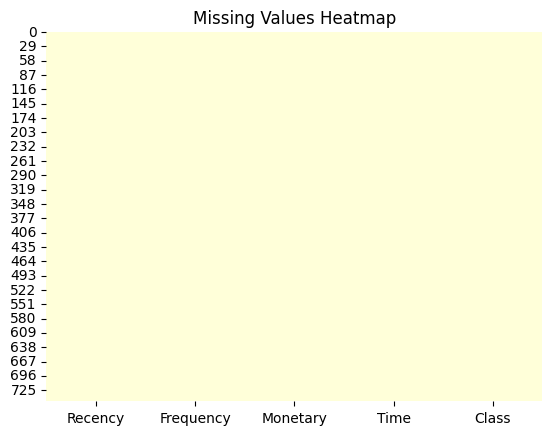

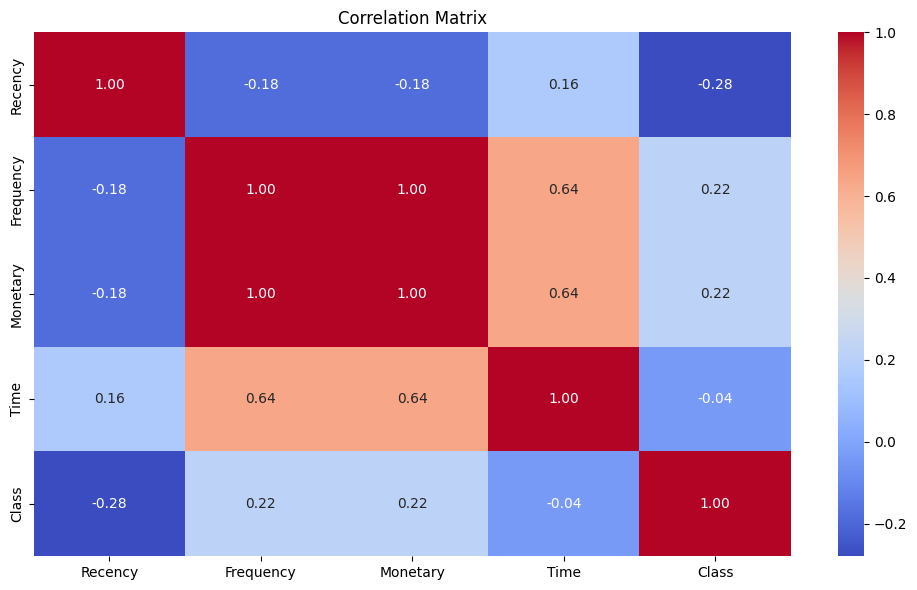

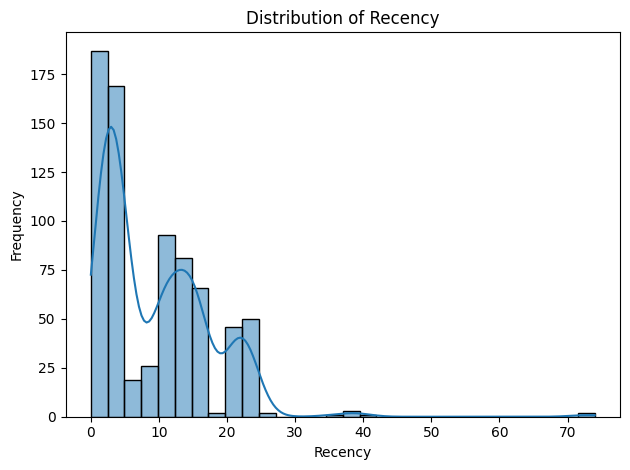

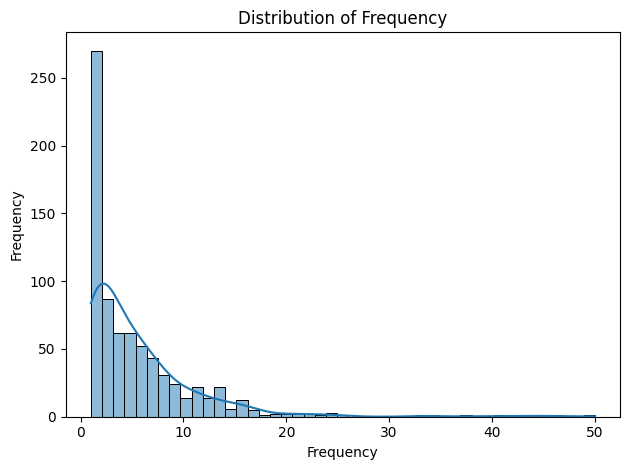

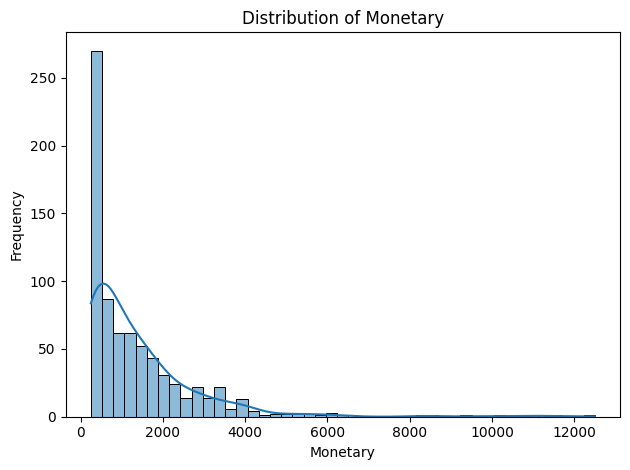

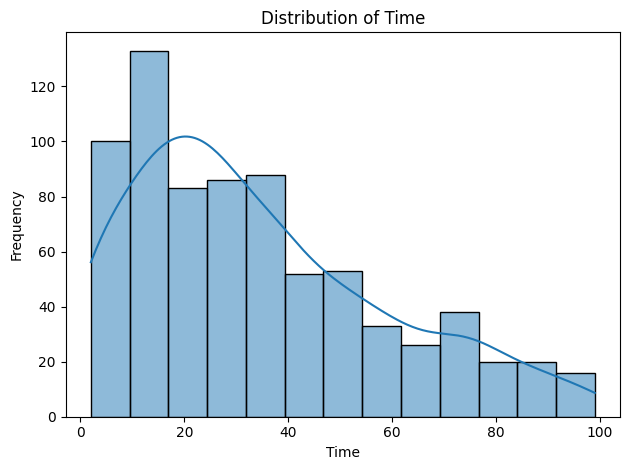

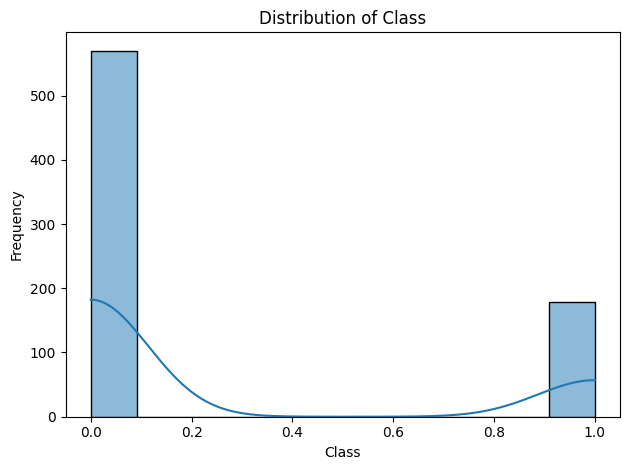

In [7]:
# Re-import libraries after code execution environment reset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../data/blood.csv")

# Enhanced preview of data
print("📌 First 5 Rows of the Dataset:")
print(df.head())

print("\n📊 Statistical Summary:")
print(df.describe(include="all"))

print("\nℹ️ Dataset Info:")
df.info()

# Check for missing values
print("\n🔍 Missing Values Summary:")
print(df.isnull().sum())

# Visualizations
# 1. Heatmap of missing values
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Values Heatmap")
plt.show()

# 2. Correlation heatmap (only numerical columns)
numeric_df = df.select_dtypes(include=["float64", "int64"])
if not numeric_df.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()

# 3. Distribution plots for numeric columns
for column in numeric_df.columns:
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

Dataset shape: (748, 5)

Data types:
 Recency      int64
Frequency    int64
Monetary     int64
Time         int64
Class        int64
dtype: object

Missing values:
 Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64

Duplicate rows removed. New shape: (533, 5)


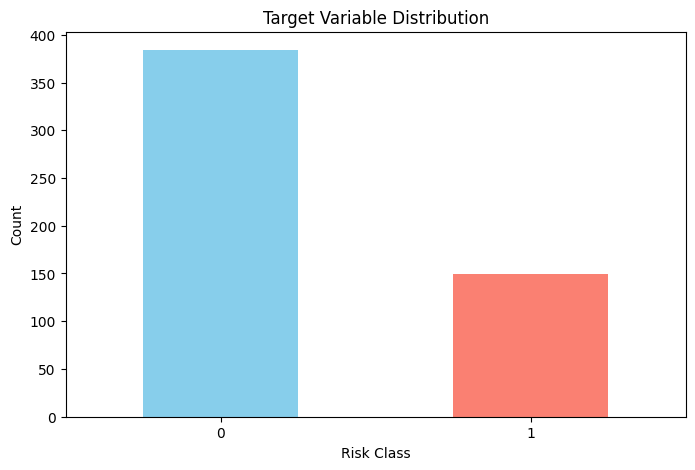


Numerical features summary:
        Frequency      Monetary        Time      Class
count  533.000000    533.000000  533.000000  533.00000
mean     6.992495   1747.654784   42.307692    0.27955
std      6.268727   1566.468760   23.299276    0.44920
min      1.000000    250.000000    2.000000    0.00000
25%      3.000000    750.000000   26.000000    0.00000
50%      5.000000   1250.000000   38.000000    0.00000
75%      9.000000   2250.000000   58.000000    1.00000
max     50.000000  12500.000000   99.000000    1.00000


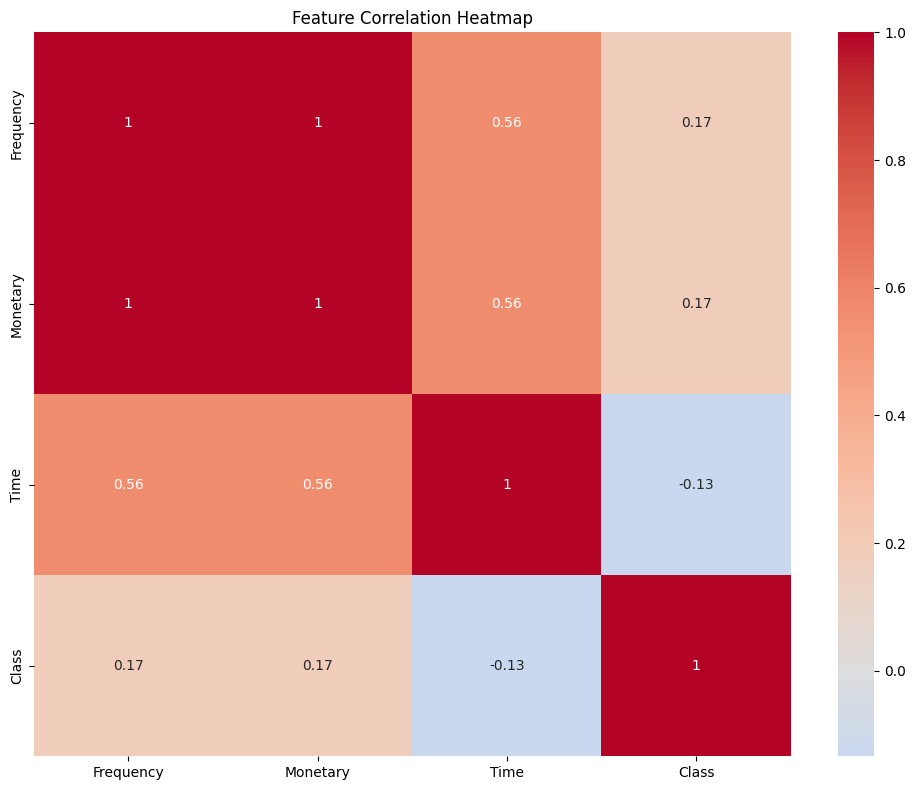

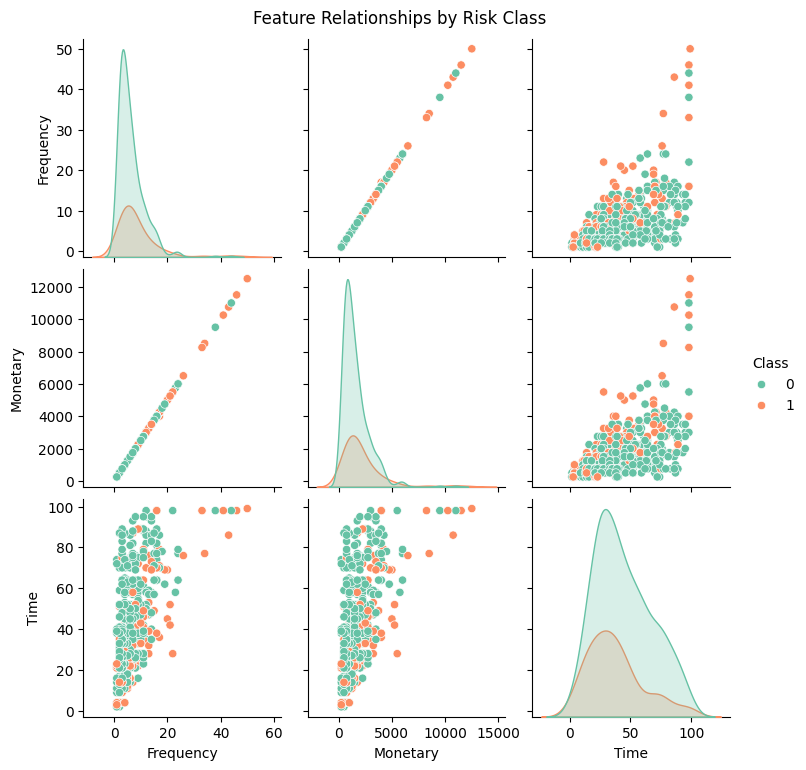


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.84        77
           1       0.75      0.10      0.18        30

    accuracy                           0.74       107
   macro avg       0.74      0.54      0.51       107
weighted avg       0.74      0.74      0.66       107


Confusion Matrix:
[[76  1]
 [27  3]]


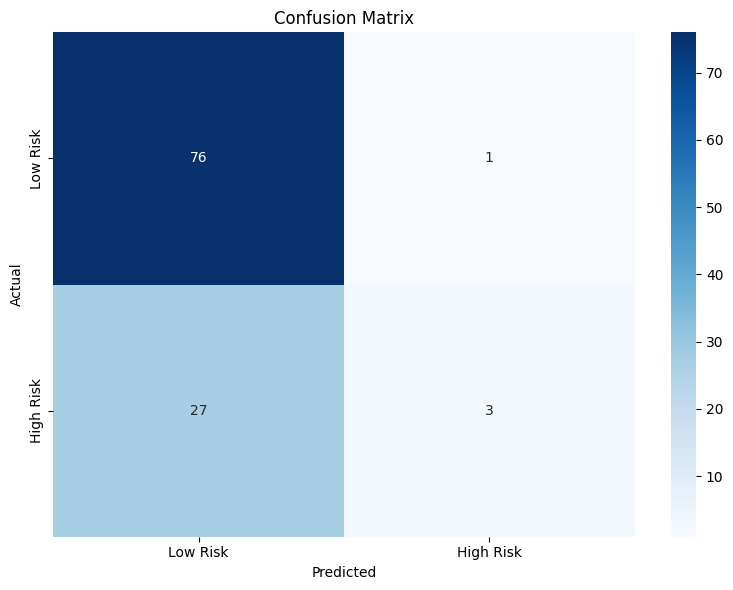

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11832\2686041899.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=coefficients, palette='viridis')


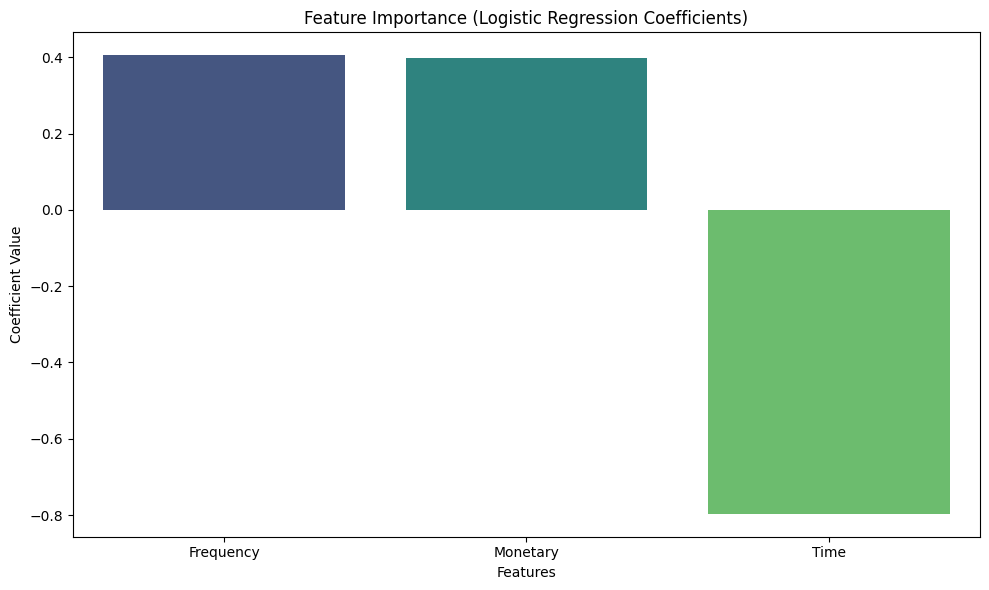


Analysis complete! Visualizations and model saved.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import os

# Create directories if they don't exist
os.makedirs("../models", exist_ok=True)
os.makedirs("../images", exist_ok=True)

# 1. Data Loading and Initial Exploration
df = pd.read_csv("../data/blood.csv")
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# 2. Data Cleaning
# Drop duplicates
df = df.drop_duplicates()
print("\nDuplicate rows removed. New shape:", df.shape)

# Drop irrelevant columns
df.drop(columns=["Recency"], inplace=True, errors="ignore")

# Check target distribution
plt.figure(figsize=(8, 5))
df["Class"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Target Variable Distribution")
plt.xlabel("Risk Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.savefig("../images/target_distribution.png")
plt.show()

# 3. Feature Analysis
# Numerical features summary
print("\nNumerical features summary:")
print(df.describe())

# Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("../images/correlation_heatmap.png")
plt.show()

# Pairplot for feature relationships
sns.pairplot(df, hue="Class", palette="Set2", diag_kind="kde")
plt.suptitle("Feature Relationships by Risk Class", y=1.02)
plt.savefig("../images/pairplot.png")
plt.show()

# 4. Data Preparation for Modeling
X = df.drop("Class", axis=1)
y = df["Class"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create pipeline
pipeline = Pipeline(
    [("scaler", StandardScaler()), ("classifier", LogisticRegression(random_state=42))]
)

# 5. Model Training
pipeline.fit(X_train, y_train)

# Save model
joblib.dump(pipeline, "../models/logistic_regression_pipeline.pkl")

# 6. Model Evaluation
y_pred = pipeline.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Low Risk", "High Risk"],
    yticklabels=["Low Risk", "High Risk"],
)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.savefig("../images/confusion_matrix.png")
plt.show()

# 7. Feature Importance Analysis
coefficients = pipeline.named_steps["classifier"].coef_[0]
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=coefficients, palette="viridis")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.tight_layout()
plt.savefig("../images/feature_importance.png")
plt.show()

print("\nAnalysis complete! Visualizations and model saved.")